In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from pylab import *

import pickle
import keras
import loadnotebook
from helper import * 

/home/izza/installdir/miniconda3/envs/stock/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from helper.ipynb


In [3]:
demo_config = {6 : [1, 2, 3, 4, 5, 14, 15, 16, 33]}

df = get_data(config=demo_config, pure=True, refresh=False)
df_data = df
print(len(df_data))

helper.ipynb:570: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  "\n",


RSRP not found ../data/demo-priority6/set3/Rose/284/284.1.nmf
RSRP not found ../data/demo-priority6/set5/Reed/139/18Aug22_091649 139.1.nmf
RSRP not found ../data/demo-priority6/set5/Peter/133/A_18Aug22_091045-133.1.nmf
RSRP not found ../data/demo-priority6/set33/Peter/47/47.1.nmf
451263


# RSRQ Prediction 

In [5]:
rsrq_data = df_data.drop(["SNR"], axis=1)
rsrq_data = rsrq_data[rsrq_data["PCI"].isin(whitelist_PCI)]
rsrq_data = rsrq_data.drop_duplicates()
rsrq_data = rsrq_data.dropna()
rsrq_data

,location_x,location_y,PCI,RSRP,RSRQ,Power_37,Power_38,Power_39,Power_40,Power_41,...,Distance_41,Distance_42,Angle_37,Angle_38,Angle_39,Angle_40,Angle_41,Angle_42,priority,set
0,554.0,238.0,39,-108.1,-8.2,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
1,554.0,238.0,40,-108.4,-9.2,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
2,554.0,238.0,40,-106.8,-8.7,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
3,554.0,238.0,38,-106.4,-8.8,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
4,554.0,238.0,40,-107.4,-9.3,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
5,554.0,238.0,39,-104.0,-7.0,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
6,554.0,238.0,39,-103.9,-7.2,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
7,554.0,238.0,40,-106.9,-9.3,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
8,554.0,238.0,39,-103.9,-7.4,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1
9,554.0,238.0,40,-107.3,-9.3,-2,3,0,5,-1,...,113.701363,144.810221,105.575048,113.989064,-95.803575,110.157611,-140.710593,76.827447,6,1


In [6]:
x_rsrq = rsrq_data.drop(["RSRQ"], axis=1)
y_rsrq = np.array(rsrq_data.RSRQ.values.tolist())
x_rsrq_train, x_rsrq_test, y_rsrq_train, y_rsrq_test = train_test_split(
    x_rsrq, y_rsrq, test_size=0.3, random_state=32)

## Data Visualization 

In [7]:
print_size_per_priority(demo_config, rsrq_data)

6 1 28998
6 2 25170
6 3 16452
6 4 24380
6 5 15105
6 14 23149
6 15 19908
6 16 17582
6 33 22123


In [9]:
x_cut = 50  
y_cut = 100 
lon_list = [int(x-x_cut) for x in rsrq_data["location_x"]]
lat_list = [int(y-y_cut) for y in rsrq_data["location_y"]]
rsrq_list = rsrq_data["RSRQ"].astype('int32')

rsrq_summary = summary_based_on_location(lat_list, lon_list, rsrq_list)
rsrq_summary = summary_dict(rsrq_summary, np.array)

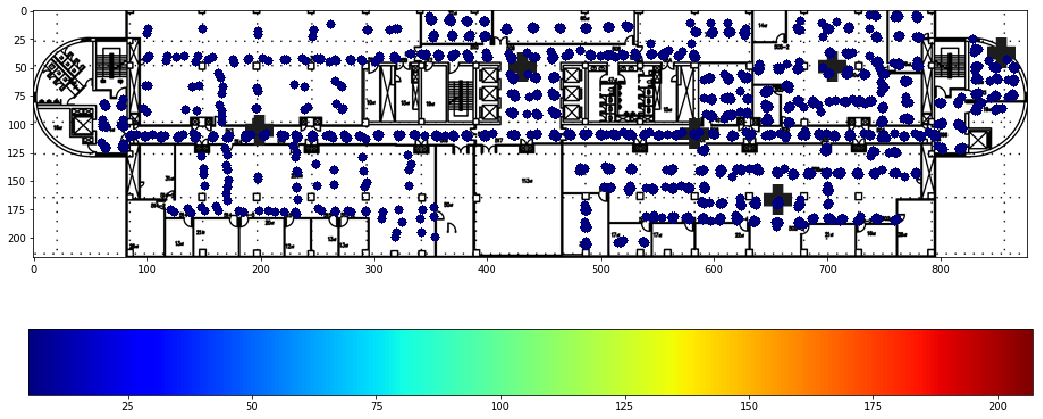

In [12]:
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)

rsrq_mean = summary_dict(rsrq_summary, np.max)
normalize_rsrq_mean = matplotlib.colors.Normalize(vmin=min(rsrq_mean), vmax=max(rsrq_mean))
x_list, y_list, rsrq_mean_list = summary_dict_to_list(rsrq_mean)
colors_rsrq_mean = [cmap(normalize_rsrq_mean(value))[:3] for value in rsrq_mean_list]
colors_rsrq_mean = [[int(x*255) for x in value] for value in colors_rsrq_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(crop, x_list, y_list, colors_rsrq_mean, 
                               cmap, normalize_rsrq_mean, None, adjustment=False)

## Generate all to be predicted data 

In [16]:
x_coord_list = []
y_coord_list = []
pci_list = []
for lon in range(0, crop.shape[1]) :
    for lat in range(0, crop.shape[0]) :
        x_coord_list.append(x_cut + lon)
        y_coord_list.append(y_cut + lat)
        
predicted_set_config = {6 : [1, 2, 3, 4, 5, 14, 15, 16, 33]}

In [17]:
all_pred_rsrp_dict = load_from_pickle("predicted_rsrp_lgbm")
all_x_rsrq_dict = generate_predicted_data_rsrq(rsrq_data, predicted_set_config, 
                                               x_coord_list, y_coord_list, all_pred_rsrp_dict, refresh=False)

helper.ipynb:715: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  "def generate_predicted_data_rsrq(rsrq_data, predicted_set_config, \n",


In [18]:
all_x_rsrq_dict[(6, 1)]

,location_x,location_y,PCI,RSRP,Power_37,Power_38,Power_39,Power_40,Power_41,Power_42,...,Distance_41,Distance_42,Angle_37,Angle_38,Angle_39,Angle_40,Angle_41,Angle_42,priority,set
0,50,100,37,-103.088966,-2,3,0,5,-1,15,...,434.883893,667.282549,87.244934,86.018505,61.733594,79.410016,83.397920,75.151548,6,1
1,50,101,37,-103.088966,-2,3,0,5,-1,15,...,434.770054,667.026986,87.312031,86.099506,61.957409,79.505004,83.528830,75.234577,6,1
2,50,102,37,-103.088966,-2,3,0,5,-1,15,...,434.658487,666.772825,87.379135,86.180523,62.182159,79.600050,83.659808,75.317669,6,1
3,50,103,37,-103.088966,-2,3,0,5,-1,15,...,434.549192,666.520067,87.446247,86.261556,62.407844,79.695154,83.790853,75.400825,6,1
4,50,104,37,-103.483993,-2,3,0,5,-1,15,...,434.442171,666.268715,87.513365,86.342603,62.634461,79.790315,83.921963,75.484043,6,1
5,50,105,37,-103.483993,-2,3,0,5,-1,15,...,434.337426,666.018769,87.580491,86.423666,62.862010,79.885533,84.053137,75.567324,6,1
6,50,106,37,-103.483993,-2,3,0,5,-1,15,...,434.234959,665.770231,87.647623,86.504742,63.090489,79.980808,84.184373,75.650668,6,1
7,50,107,37,-103.483993,-2,3,0,5,-1,15,...,434.134772,665.523103,87.714761,86.585833,63.319897,80.076138,84.315671,75.734074,6,1
8,50,108,37,-103.483993,-2,3,0,5,-1,15,...,434.036865,665.277386,87.781906,86.666937,63.550232,80.171525,84.447029,75.817541,6,1
9,50,109,37,-103.483993,-2,3,0,5,-1,15,...,433.941240,665.033082,87.849057,86.748054,63.781492,80.266966,84.578445,75.901070,6,1


## Tensorflow 

In [13]:
import tensorflow as tf 

def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features.to_dict('list')), labels))
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels=None, batch_size=None):
    features = features.to_dict('list')

    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)

    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    return dataset.make_one_shot_iterator().get_next()

def regression_model_fn(features, labels, mode, params):
    net = tf.feature_column.input_layer(features, params["feature_columns"])
    net = params['model'](net, params)
    
    #predictions
    predictions = tf.squeeze(net, 1)

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode=mode, predictions={"predictions": predictions})

    average_loss = tf.losses.absolute_difference(labels, predictions)

    batch_size = tf.shape(labels)[0]
    total_loss = tf.to_float(batch_size) * average_loss

    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = params.get("optimizer", tf.train.AdamOptimizer)
        optimizer = optimizer(params.get("learning_rate", None))
        train_op = optimizer.minimize(
            loss=average_loss, global_step=tf.train.get_global_step())

        return tf.estimator.EstimatorSpec(
            mode=mode, loss=total_loss, train_op=train_op)

    # In evaluation mode we will calculate evaluation metrics.
    assert mode == tf.estimator.ModeKeys.EVAL

    # Calculate root mean squared error
    rmse = tf.metrics.root_mean_squared_error(labels, predictions)

    # Add the rmse to the collection of evaluation metrics.
    eval_metrics = {"rmse": rmse}

    return tf.estimator.EstimatorSpec(mode=mode, loss=total_loss, eval_metric_ops=eval_metrics)

In [14]:
def get_linear_feature_column(name) :
    if 'Distance' in name or 'Angle' in name or 'RSRP' in name :
        return tf.feature_column.numeric_column(
            key=name, shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
    else :
        return tf.feature_column.numeric_column(
            key=name, shape=(1,), default_value=None, dtype=tf.int32, normalizer_fn=None)

linear_feature_set = {str(x):get_linear_feature_column(str(x)) for x in x_rsrq_train.columns}

f_location = tf.feature_column.embedding_column(tf.feature_column.crossed_column(
    keys=["location_x", "location_y"], hash_bucket_size=50000, hash_key=None), 2, combiner='sqrtn')

f_pci = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_vocabulary_list(
    key="PCI",vocabulary_list=rsrq_data.PCI.unique(), dtype=tf.int64), len(whitelist_PCI))

f_power = tf.feature_column.embedding_column(tf.feature_column.crossed_column(
    keys=["Power_" + str(bs) for bs in bs_location], hash_bucket_size=25, hash_key=None), 
                                             len(bs_location), combiner='sum')
    
f_beam = {"beam"+str(bs): tf.feature_column.embedding_column(tf.feature_column.crossed_column(
    keys=[str(bs)+"_beam0", str(bs)+"_beam32", str(bs)+"_beam64", str(bs)+"_beam96", str(bs)+"_beam128"], 
    hash_bucket_size=1000, hash_key=None), 10, combiner='sum') for bs in bs_location}

f_distance_boundaries = {str(bs): tf.feature_column.embedding_column(tf.feature_column.bucketized_column(
    linear_feature_set["Distance_" + str(bs)], 
    boundaries=[50, 100, 150, 200]), len(bs_location)) for bs in bs_location}

f_angle_boundaries = {str(bs): tf.feature_column.embedding_column(tf.feature_column.bucketized_column(
    linear_feature_set["Angle_" + str(bs)], 
    boundaries=[-135, -90, -45, 0, 45, 90, 135]), len(bs_location)) for bs in bs_location}

# 4.9 3.7
semi_linear_feature_set = {**linear_feature_set, **{"location" : f_location, "PCI" : f_pci}}

# 4.9 3.8
semi_linear_2_feature_set = {**linear_feature_set,
                             **f_beam,
                             **{"location" : f_location, 
                                "PCI" : f_pci, 
                                "power" : f_power}}

# 4.8 3.9
semi_linear_3_feature_set = {**linear_feature_set,
                             **f_beam,
                             **f_distance_boundaries, 
                             **f_angle_boundaries, 
                             **{"location" : f_location, 
                                "PCI" : f_pci, 
                                "power" : f_power}}

# Tensorflow NN 

In [15]:
def nn_model(net, params) :
    counter = 0
    for units in params['hidden_units']:
        net = tf.layers.dense(net, units=units, activation=tf.nn.relu)
        net = tf.layers.batch_normalization(net, momentum=0.9)
        
        counter += 1
        if counter % 2 == 0 :
            net = tf.layers.dropout(net, rate=0.2)
    logits = tf.layers.dense(net, 1, activation=None)
    return logits

In [16]:
nn_regressor = tf.estimator.Estimator(
    model_dir="../model/rsrq/tensor_nn/semi_linear_feature_set",
    model_fn=regression_model_fn,
    config=tf.estimator.RunConfig(log_step_count_steps=2000),
    params={
        'feature_columns': list(semi_linear_feature_set.values()),
        'hidden_units': [32, 64, 128, 64, 16, 8],
        'model' : nn_model,
        'learning_rate': 0.0001,
        'optimizer': tf.train.AdamOptimizer,
        'model' : nn_model
    })

INFO:tensorflow:Using config: {'_model_dir': '../model/rsrq/tensor_nn/semi_linear_feature_set', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 2000, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f16573303c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
nn_regressor.train(
    input_fn=lambda:train_input_fn(x_rsrq_train, y_rsrq_train, 32),
    steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/rsrq/tensor_nn/semi_linear_feature_set/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20001 into ../model/rsrq/tensor_nn/semi_linear_feature_set/model.ckpt.
INFO:tensorflow:loss = 12.4810095, step = 20001
INFO:tensorflow:global_step/sec: 513.507
INFO:tensorflow:loss = 16.713602, step = 22001 (3.895 sec)
INFO:tensorflow:global_step/sec: 558.767
INFO:tensorflow:loss = 23.423828, step = 24001 (3.579 sec)
INFO:tensorflow:global_step/sec: 578.852
INFO:tensorflow:loss = 13.957717, step = 26001 (3.455 sec)
INFO:tensorflow:global_step/sec: 595.525
INFO:tensorflow:loss = 23.779829, step = 28001 (3.358 sec)
INFO:tensorflow:Saving checkpoints for 30000 into ../model/rsrq/tensor_nn/semi_linear_feature_set/

In [18]:
nn_regressor.evaluate(
    input_fn=lambda:eval_input_fn(x_rsrq_test, np.array(y_rsrq_test, dtype=float32), 700))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-26-03:18:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/rsrq/tensor_nn/semi_linear_feature_set/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-26-03:18:47
INFO:tensorflow:Saving dict for global step 30000: global_step = 30000, loss = 386.98093, rmse = 1.1588501


{'loss': 386.98093, 'rmse': 1.1588501, 'global_step': 30000}

In [17]:
nn_regressor.evaluate(
    input_fn=lambda:eval_input_fn(x_rsrq_test, np.array(y_rsrq_test, dtype=float32), 700))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-25-06:41:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/rsrq/tensor_nn/semi_linear_feature_set/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-25-06:41:57
INFO:tensorflow:Saving dict for global step 20000: global_step = 20000, loss = 396.4225, rmse = 1.1775824


{'loss': 396.4225, 'rmse': 1.1775824, 'global_step': 20000}

In [19]:
nn_est_tensor_predictions = {(p,s):nn_regressor.predict(
    input_fn=lambda:eval_input_fn(all_x_rsrq_dict[(p,s)], batch_size=10)) for p,s in all_x_rsrq_dict}

all_y_rsrq_tensor_nn = {}
for key in nn_est_tensor_predictions :
    all_y_rsrq_tensor_nn[key] = [p['predictions'] for p in nn_est_tensor_predictions[key]]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/rsrq/tensor_nn/semi_linear_feature_set/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/rsrq/tensor_nn/semi_linear_feature_set/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/rsrq/tensor_nn/semi_linear_feature_set/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was f

In [20]:
for set_val in all_y_rsrq_tensor_nn :
    y_pred = all_y_rsrq_tensor_nn[set_val]
    print(str(set_val) + ":" + str(np.sum(y_pred)))

(1, 1):-394139.62
(1, 2):-394139.62
(1, 3):-394139.62
(1, 4):-394139.62
(1, 5):-394139.62
(1, 6):-394139.62
(1, 7):-394139.62
(2, 1):-394139.62
(2, 2):-394139.62
(2, 3):-394139.62
(2, 4):-394139.62
(2, 5):-394139.62
(2, 6):-394139.62
(3, 1):-394139.62
(3, 2):-394139.62
(3, 3):-394139.62
(3, 4):-394139.62
(3, 5):-394139.62
(3, 6):-394139.62
(3, 7):-394139.62
(4, 1):-394139.62
(4, 2):-394139.62
(4, 3):-394139.62
(4, 4):-394139.62


# Keras MLP

In [100]:
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

input_dims = len(x_rsrp_train.columns)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dims))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(np.array(x_rsrp_train.values.tolist()), y_rsrp_train, epochs=100, batch_size=512)

RuntimeError: Graph is finalized and cannot be modified.

In [318]:
score = model.evaluate(x_rsrp_test, y_rsrp_test, batch_size=128)
score

15064/15064 [==============================] - 0s 32us/step


438.4918548535364

In [99]:
all_y_rsrp_keras = {set_val:model.predict(all_x_rsrp_dict[set_val]) for set_val in all_x_rsrp_dict}

NameError: name 'model' is not defined

In [320]:
all_y_rsrp_keras_mlp = {set_val:np.argmax(all_y_rsrp_keras[set_val], axis=1) for set_val in all_y_rsrp_keras}

In [321]:
for set_val in all_y_rsrp_keras_mlp :
    y_pred = all_y_rsrp_keras_mlp[set_val]
    print(str(set_val) + ":" + str(np.sum(y_pred)))

(1, 1):0
(1, 2):0
(1, 3):0
(1, 4):0
(1, 5):0
(1, 6):0
(1, 7):0
(2, 1):0
(2, 2):0
(2, 3):0
(2, 4):0
(2, 5):0
(2, 6):0
(3, 1):0
(3, 2):0
(3, 3):0
(3, 4):0
(3, 5):0
(3, 6):0
(3, 7):0
(4, 1):0
(4, 2):0
(4, 3):0
(4, 4):0


# XGBoost 

In [19]:
from xgboost import XGBRegressor
import sklearn.metrics as m

xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                       silent=True, subsample=1)

In [20]:
xgb_model.fit(x_rsrq_train, y_rsrq_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
y_rsrq_pred = xgb_model.predict(x_rsrq_test)
predictions = [round(value) for value in y_rsrq_pred]
mae = m.mean_absolute_error(y_rsrq_test, predictions)
print("Mae", mae)

Mae 0.4879348784155129


In [23]:
all_y_rsrq_xgboost = {set_val:xgb_model.predict(all_x_rsrq_dict[set_val]) for set_val in all_x_rsrq_dict}

# LGBM 

In [24]:
import lightgbm
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [25]:
lgbm_model.fit(x_rsrq_train, y_rsrq_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
y_rsrq_pred = lgbm_model.predict(x_rsrq_test)
predictions = [round(value) for value in y_rsrq_pred]
mae = m.mean_absolute_error(y_rsrq_test, predictions)
print("Mae", mae)

Mae 0.40901125110177833


In [28]:
all_y_rsrq_lgbm = {set_val:lgbm_model.predict(all_x_rsrq_dict[set_val]) for set_val in all_x_rsrq_dict}

## Visualize Prediction 

In [29]:
all_y_rsrq_dict = {"xgboost":all_y_rsrq_xgboost,
                   "lgbm":all_y_rsrq_lgbm}

In [30]:
background = old_origin_img[y_cut:318, x_cut:927]
background = cv2.cvtColor(background, cv2.COLOR_GRAY2RGB)
x_coord_view = [lon-x_cut for lon in x_coord_list]
y_coord_view = [lat-y_cut for lat in y_coord_list]
normalize_rsrq = matplotlib.colors.Normalize(vmin=-10, vmax=-5)

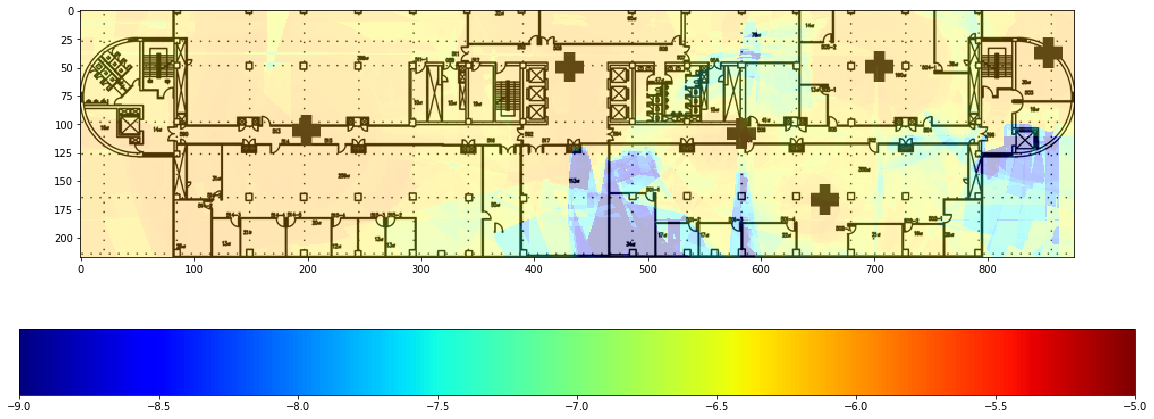

In [52]:
p, s = 6, 2
model_name = "lgbm"
all_y_rsrq = all_y_rsrq_dict[model_name]
rsrq_pred = all_y_rsrq[(p, s)]
normalize_rsrq = matplotlib.colors.Normalize(vmin=-9, vmax=-5)
rsrq_pred = [cmap(normalize_rsrq(value))[:3] for value in rsrq_pred]
rsrq_pred = [[int(x*255) for x in value] for value in rsrq_pred]
    
a=visualize_all_location_heatmap(background, x_coord_view, y_coord_view, rsrq_pred, 
                                 cmap, normalize_rsrq, filename=None,
                                 size=2, figsize=(20,10), adjustment=False)

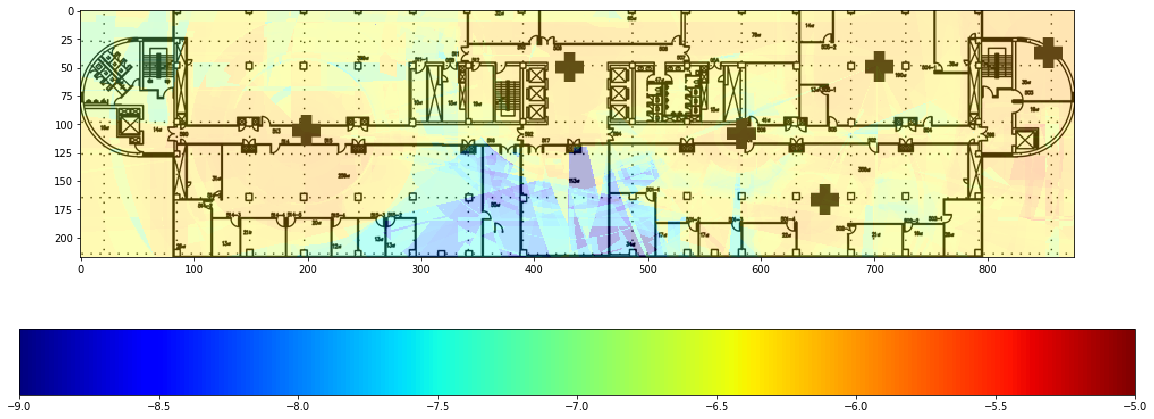

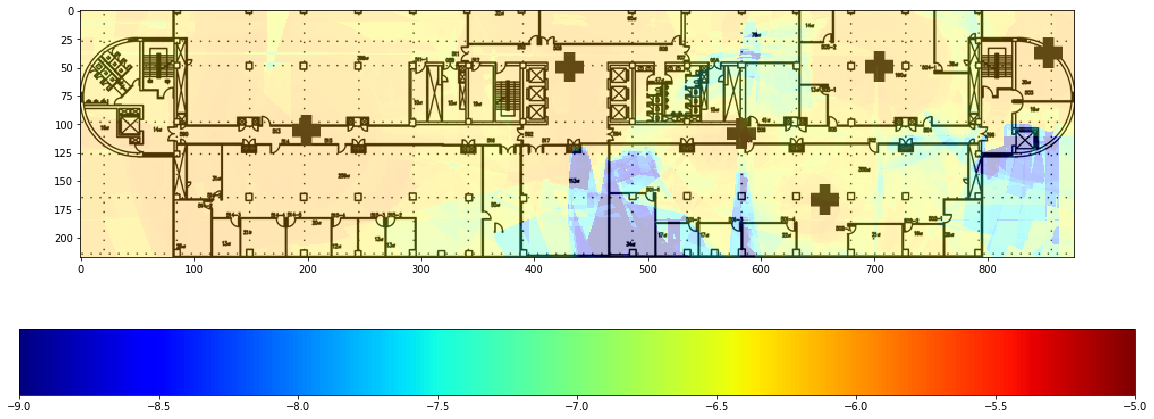

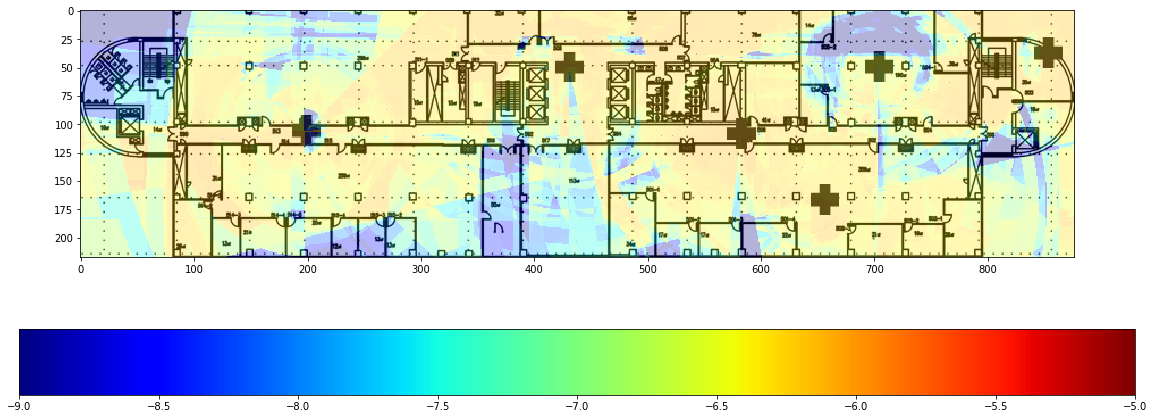

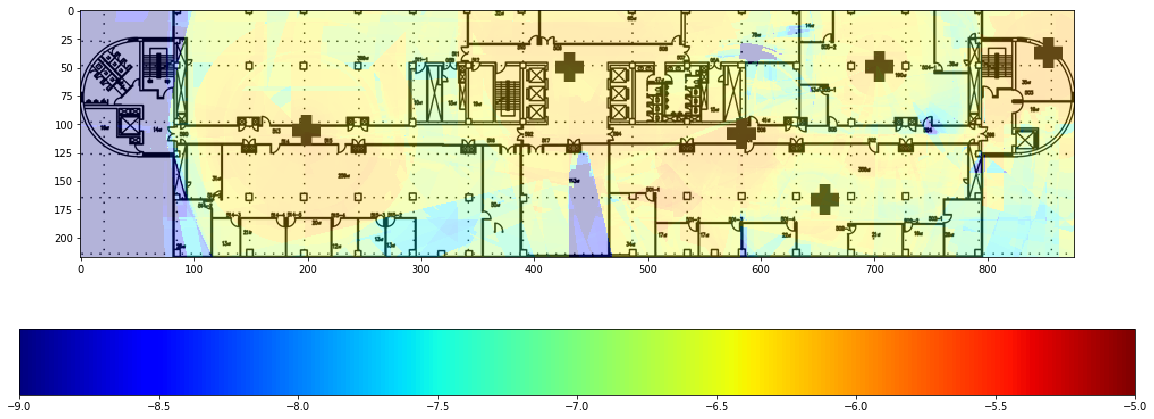

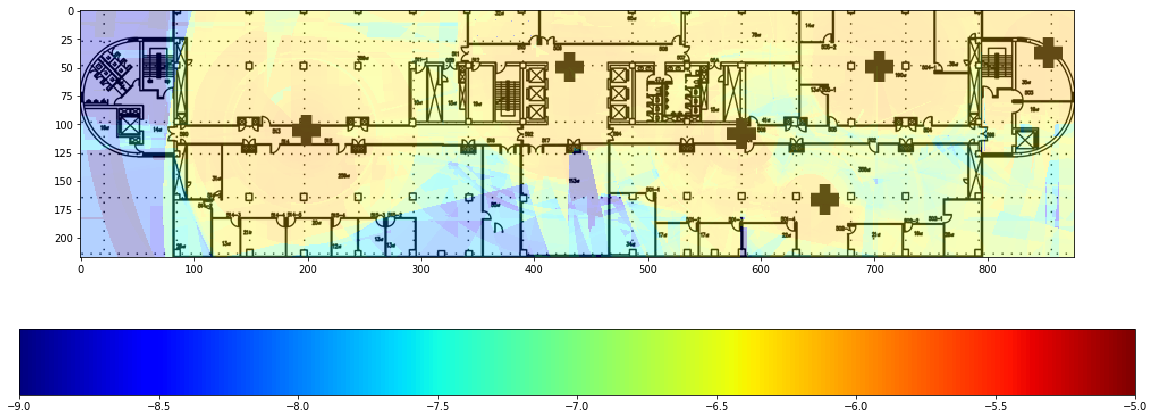

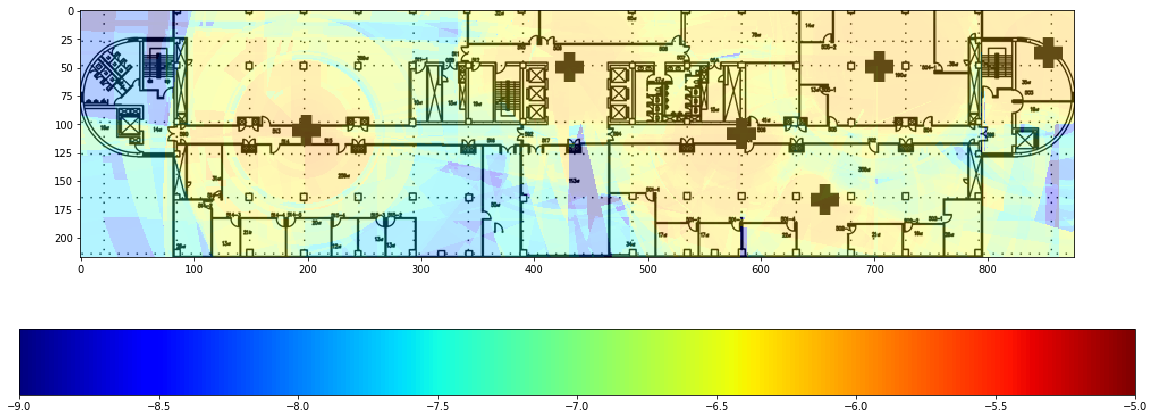

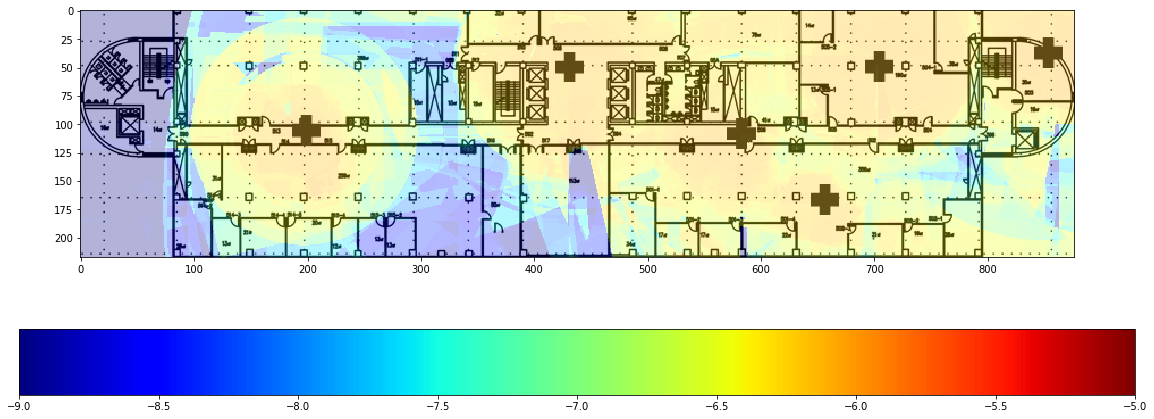

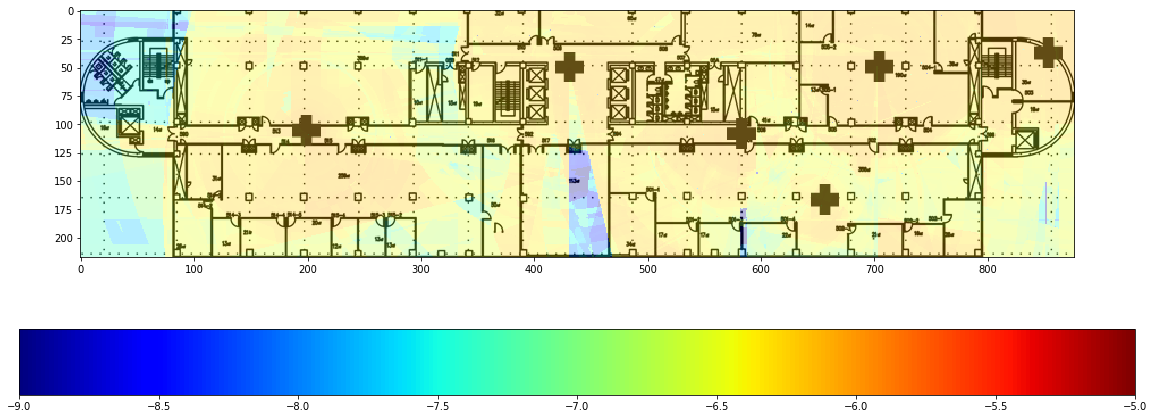

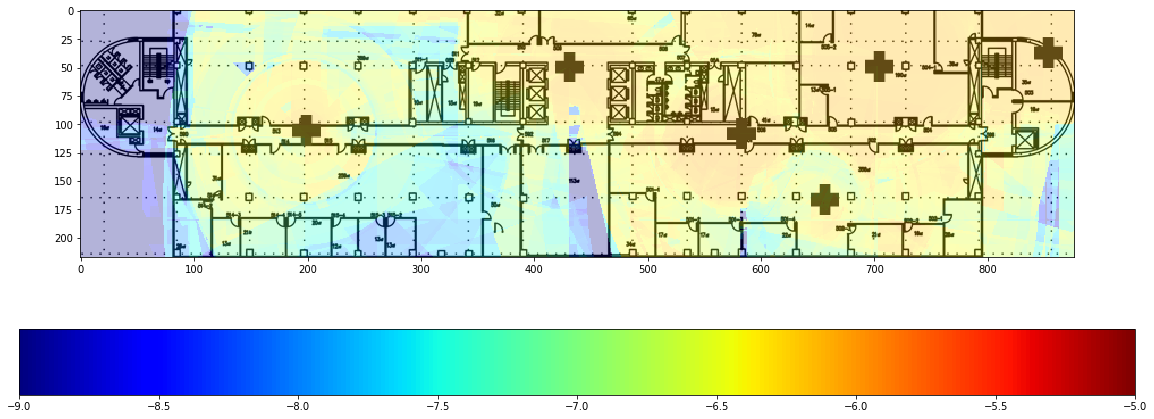

In [53]:
for p in predicted_set_config :
    for s in predicted_set_config[p] :
        path = "../results/predicted/rsrq/%s/priority_%d_set_%d.png" % (model_name, p, s)
        rsrq_pred = all_y_rsrq[(p, s)]
        normalize_rsrq = matplotlib.colors.Normalize(vmin=-9, vmax=-5)
        rsrq_pred = [cmap(normalize_rsrq(value))[:3] for value in rsrq_pred]
        rsrq_pred = [[int(x*255) for x in value] for value in rsrq_pred]
        a=visualize_all_location_heatmap(background, x_coord_view, y_coord_view, rsrq_pred,
                                         cmap, normalize_rsrq, filename=path,
                                         size=2, figsize=(20,10), adjustment=False)

In [44]:
all_pred_rsrq_dict = {}
for m in all_y_rsrq_dict : 
    for k in all_x_rsrq_dict :
        x_rsrq = all_x_rsrq_dict[k]
        x_rsrq["pred_RSRQ"] = all_y_rsrq_dict[m][k]
        x_rsrq = x_rsrq[["location_x", "location_y", "PCI", "RSRP", "pred_RSRQ"]]
        all_pred_rsrq_dict[k] = x_rsrq
    
    save_to_pickle(all_pred_rsrq_dict, "predicted_rsrq_" + m)

-1307747.6363088065


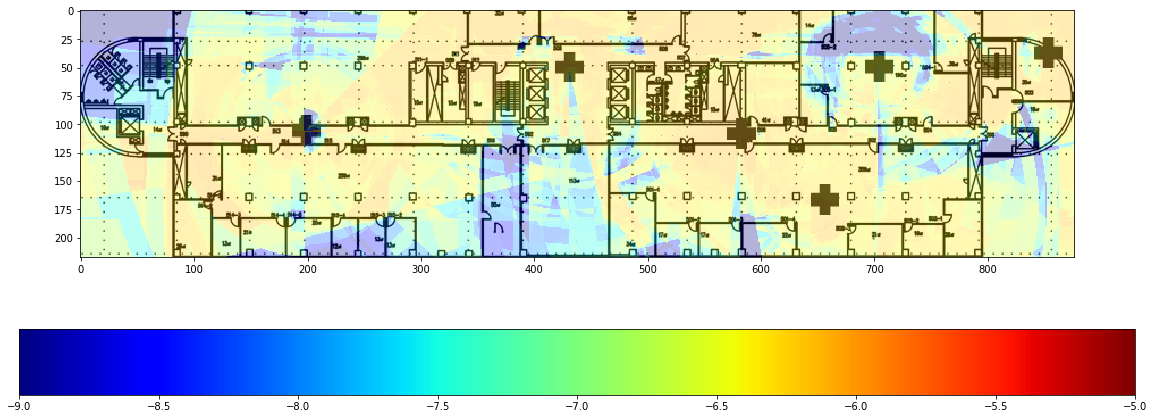

In [49]:
saved_all_y_rsrq = load_from_pickle("predicted_rsrq_lgbm")

all_y_rsrq = saved_all_y_rsrq
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
x_coord_view = [lon-x_cut for lon in x_coord_list]
y_coord_view = [lat-y_cut for lat in y_coord_list]
p, s = 6, 3

rsrq_pred = all_y_rsrq[(p, s)]["pred_RSRQ"]
print(np.sum(rsrq_pred))
rsrq_pred = [cmap(normalize_rsrq(value))[:3] for value in rsrq_pred]
rsrq_pred = [[int(x*255) for x in value] for value in rsrq_pred]

a=visualize_all_location_heatmap(background, x_coord_view, y_coord_view, rsrq_pred, 
                                 cmap, normalize_rsrq, filename=None,
                                 size=2, figsize=(20,10), adjustment=False)